In [13]:
import math
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint


#### Funções

In [14]:
def get_Qr(T):
    return (q*Cp + hA)*T - q*Cp*Tf - hA*Tcf


def get_Qg(T):
    return (deltaH_neg*v*q*Cf*k0*math.exp(-E/(R*T)))/(q + v*k0*math.exp(-E/(R*T)))


def get_f(T):
    return get_Qg(T) - get_Qr(T)


def get_C(T):
    return q*Cf/(q + v*k0*math.exp(-E/(R*T)))


def get_df(T):
    return deltaH_neg*v*(q**2)*Cf*k0*E*math.exp(E/(R*T))/((T**2)*((q*math.exp(E/(R*T)) + v*k0)**2)) - q*Cp - hA


def get_newT(T, C):
    return (deltaH_neg*v*k0*C*math.exp(-E/(R*T)) + hA*Tcf + q*Cp*Tf)/(q*Cp + hA)


def get_Tcf(q, T):
    return T + v*(q*Cp*(T - Tf)/hA - deltaH_neg*k0*q*Cf/(q + k0*math.exp(-E/(R*T)))*math.exp(-E/(R*T))/hA)


#### Parâmetros

In [15]:
q: float = 0.1
v: float = 0.1
k0: float = 9703*3600
deltaH_neg: float = 5960
E: float = 11843
Cp: float = 500
hA: float = 15
R: float = 1.987
Tcf: float = 298.5
Tf: float = 298.15
Cf: float = 10

#### Letra A

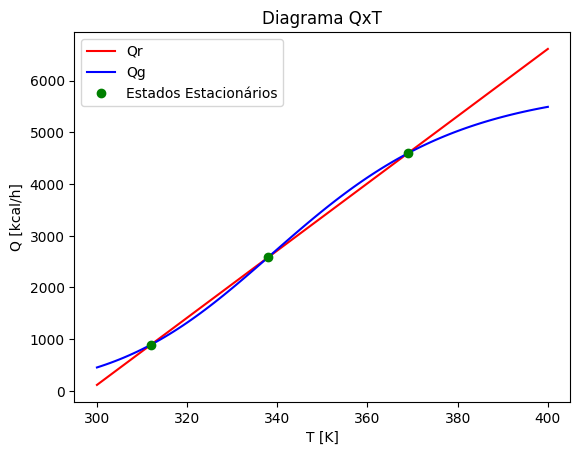

In [16]:
T = [value for value in range(401) if value >= 300 and value <= 400]

Qr = []
Qg = []
zerosT = []
zerosQ = []

for i, temperature in enumerate(T):
    Qr.append(get_Qr(temperature))
    Qg.append(get_Qg(temperature))
    if abs(Qr[i] - Qg[i]) <= 5:
        zerosT.append(temperature)
        zerosQ.append(Qr[i])

fig, ax = plt.subplots()
qr, qg, ee = ax.plot(T, Qr, 'r', T, Qg, 'b', zerosT, zerosQ, 'go')
qr.set_label('Qr')
qg.set_label('Qg')
ee.set_label("Estados Estacionários")
plt.title('Diagrama QxT')
plt.xlabel('T [K]')
plt.ylabel('Q [kcal/h]')
plt.legend()
plt.show()

#### Letra B

In [17]:
T_estacionario = []
C_estacionario = []

tolerance = 10**-25
error = 1
T0 = 312
C = []
T = [T0]
i = 0
while error > tolerance and i <= 10000:
    f = get_f(T[i])
    df = get_df(T[i])
    C.append(get_C(T[i]))
    T.append(T[i] - f/df)
    error = abs((T[i+1]-T[i])/T[i])
    i += 1

print(
    f'Tee = {T[len(T)-1]:.0f}K, Cee = {C[len(C)-1]:.2f}mol/L rodando {i} iterações')

T_estacionario.append(T[len(T)-1])
C_estacionario.append(C[len(C)-1])

tolerance = 10**-25
error = 1
T0 = 337
C = []
T = [T0]
i = 0
while error > tolerance and i <= 10000:
    C.append(get_C(T[i]))
    T.append(get_newT(T[i], C[i]))
    error = abs((T[i+1]-T[i])/T[i])
    i += 1

print(
    f'Tee = {T[len(T)-1]:.0f}K, Cee = {C[len(C)-1]:.2f}mol/L rodando {i} iterações')

T_estacionario.append(T[len(T)-1])
C_estacionario.append(C[len(C)-1])

tolerance = 10**-25
error = 1
T0 = 367
C = []
T = [T0]
i = 0
while error > tolerance and i <= 10000:
    C.append(get_C(T[i]))
    T.append(get_newT(T[i], C[i]))
    error = abs((T[i+1]-T[i])/T[i])
    i += 1

print(
    f'Tee = {T[len(T)-1]:.0f}K, Cee = {C[len(C)-1]:.2f}mol/L rodando {i} iterações')

T_estacionario.append(T[len(T)-1])
C_estacionario.append(C[len(C)-1])


Tee = 338K, Cee = 5.69mol/L rodando 239 iterações
Tee = 312K, Cee = 8.50mol/L rodando 120 iterações
Tee = 369K, Cee = 2.29mol/L rodando 88 iterações


#### Letra C

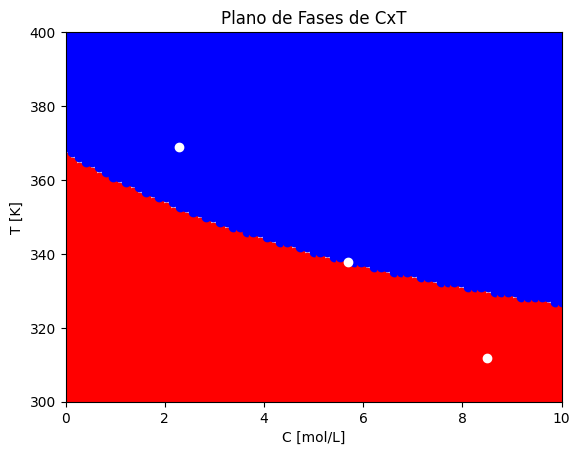

In [18]:
def dSdt(S, t):
    C, T = S
    dCdt = q * Cf / v - C * (k0 * math.exp(-E / (R * T)) + q / v)
    dTdt = q * Tf / v + deltaH_neg * k0 * C * \
        math.exp(-E / (R * T)) / Cp + hA * Tcf / \
        (v * Cp) - T * (q / v + hA / (v * Cp))
    return [dCdt, dTdt]


t = np.linspace(0, 1, 100)
C0 = np.linspace(0, 10, 75)
T0 = np.linspace(300, 400, 75)

for i in range(len(C0)):
    for j in range(len(T0)):

        S0 = [C0[i], T0[j]]
        sol = odeint(dSdt, S0, t)

        C_plot = sol[:, 0]
        T_plot = sol[:, 1]

        if round(T_plot[-1]) < 338:
            plt.scatter(C0[i], T0[j], color='r')
        elif round(T_plot[-1]) > 338:
            plt.scatter(C0[i], T0[j], color='b')


plt.scatter(C_estacionario,T_estacionario, color = "w")

plt.ylim(300, 400)
plt.xlim(0, 10)
plt.xlabel('C [mol/L]')
plt.ylabel('T [K]')
plt.title('Plano de Fases de CxT')
plt.show()

#### Letra D

##### Curvas em 3 dimensões

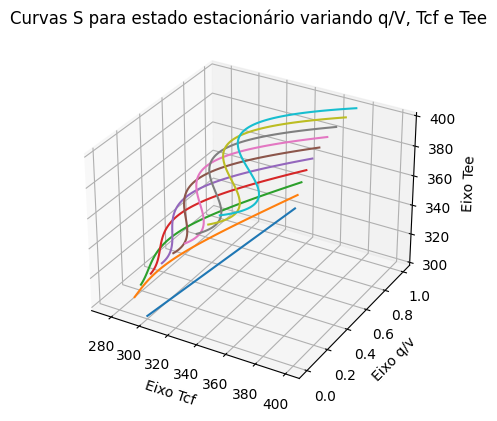

In [23]:
Tee = np.linspace(300, 400, 100)
qv_graph = np.linspace(0, 1, 10)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for flow in qv_graph:
    Tcf_graph = []
    Cee = []
    i = 0

    for temperature in Tee:
        Tcf_graph.append(get_Tcf(flow, temperature))
        i += 1

    ax.plot(Tcf_graph, flow * np.ones(len(Tcf_graph)), Tee)

    ax.set_xlabel('Eixo Tcf')
    ax.set_ylabel('Eixo q/v')
    ax.set_zlabel('Eixo Tee')
    ax.set_title('Curvas S para estado estacionário variando q/V, Tcf e Tee')

plt.show()


##### Superfície em 3 dimensões

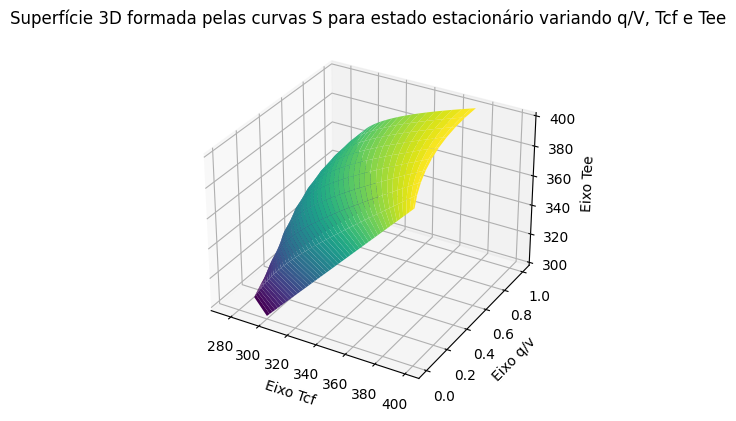

In [20]:
Tee_grid, qv_graph_grid = np.meshgrid(Tee, qv_graph)

Tcf_graph_grid = Tee_grid + v*(qv_graph_grid*Cp*(Tee_grid - Tf)/hA - deltaH_neg*k0*(
    qv_graph_grid*Cf/(qv_graph_grid + k0*np.exp(-E/(R*Tee_grid))))*np.exp(-E/(R*Tee_grid))/hA)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(Tcf_graph_grid, qv_graph_grid, Tee_grid, cmap='viridis')

ax.set_xlabel('Eixo Tcf')
ax.set_ylabel('Eixo q/v')
ax.set_zlabel('Eixo Tee')
ax.set_title('Superfície 3D formada pelas curvas S para estado estacionário variando q/V, Tcf e Tee')

plt.show()